In [1]:
# This notebook uses IEX's sandbox environment with unlimited monthly queries.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
import os
import requests

In [4]:
import env

credentials loaded successfully


In [5]:
import pyEX as p

In [6]:
c = p.Client(api_token = env.token, version = 'stable')

In [7]:
import iexfinance as iex

In [8]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

In [9]:
os.environ['IEX_TOKEN'] = env.sandbox_token

In [10]:
from iexfinance.stocks import get_historical_data

In [11]:
now = datetime.date.today()
now

datetime.date(2021, 1, 29)

In [12]:
start = datetime.datetime(2017, 1, 1)
end = now

In [13]:
spy = get_historical_data("SPY", start, end, output_format = 'pandas')

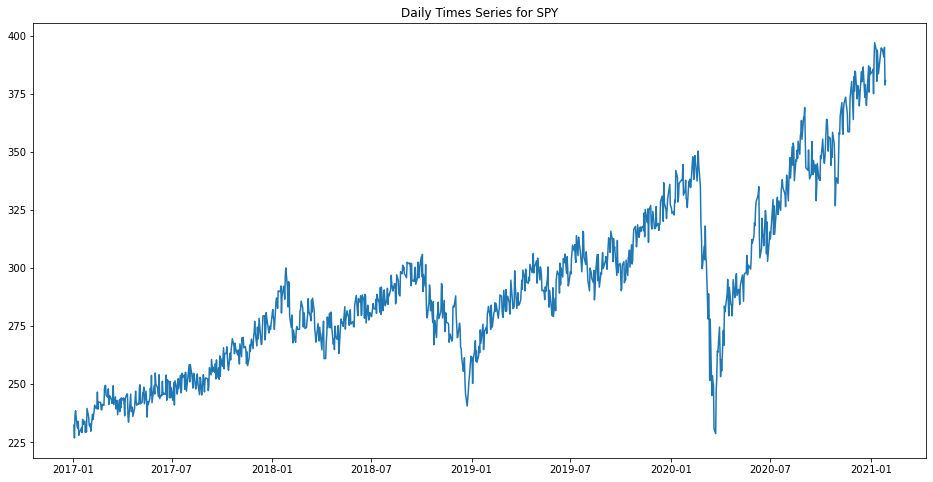

In [14]:
plt.figure(figsize = (16, 8))
plt.plot(spy.index, spy['close'])
plt.title("Daily Times Series for SPY")
plt.show()

In [15]:
tsla = get_historical_data("TSLA", start, end, output_format = 'pandas')

In [16]:
tsla

,open,high,low,close,volume
date,,,,,
2017-01-03,43.783,45.546,42.8770,45.023,29816015
2017-01-04,44.230,46.100,44.2120,46.807,57718361
2017-01-05,46.741,46.212,45.9400,45.880,30586026
2017-01-06,47.636,46.120,45.5900,47.996,28584571
2017-01-09,46.077,47.220,47.5000,47.803,20363222
...,...,...,...,...,...
2021-01-22,839.100,860.000,861.3500,861.450,20502527
2021-01-25,856.000,943.000,872.9874,903.200,41206322
2021-01-26,905.200,912.600,895.5000,913.730,24146825


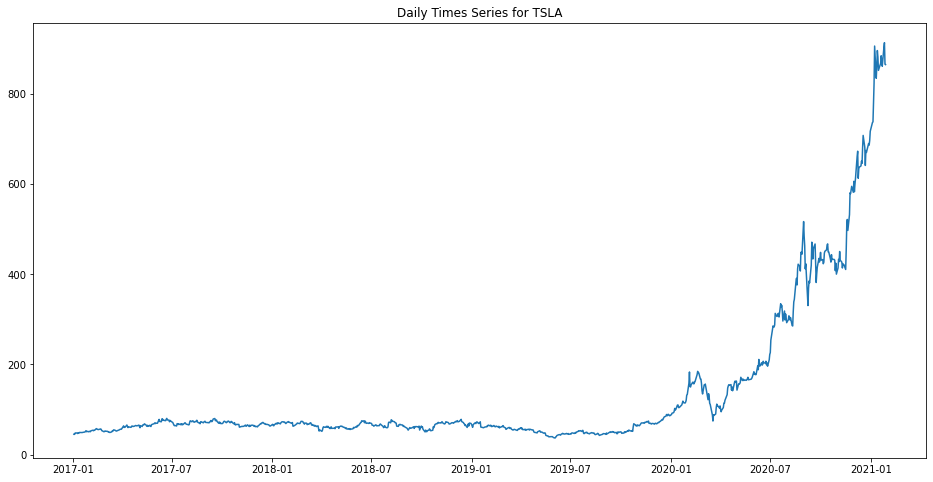

In [17]:
plt.figure(figsize = (16, 8))
plt.plot(tsla.index, tsla['close'])
plt.title("Daily Times Series for TSLA")
plt.show()

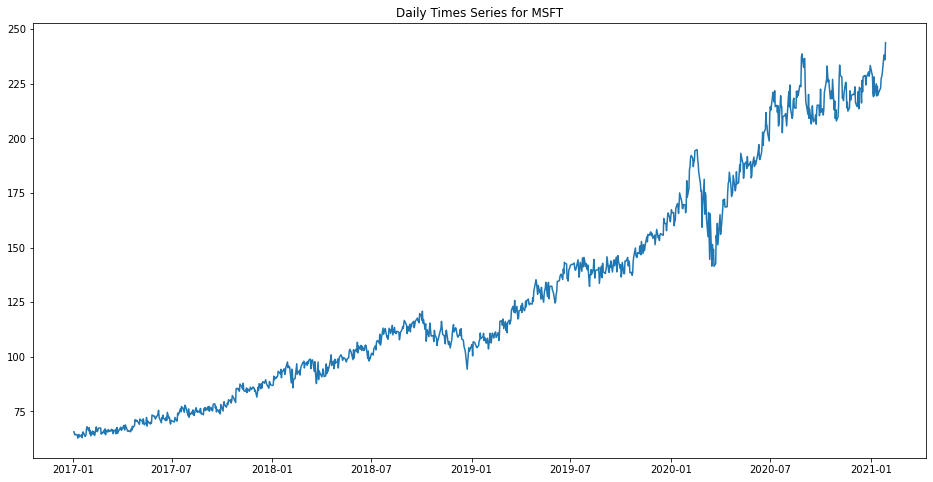

In [18]:
# Creating a function for this process:

msft = get_historical_data("MSFT", start, end, output_format = 'pandas')

plt.figure(figsize = (16, 8))
plt.plot(msft.index, msft['close'])
plt.title("Daily Times Series for MSFT")
plt.show()

In [19]:
def get_stock_chart(ticker, start_date, end_date, output_format = 'pandas'):
    
    '''This function will take the inputs from the user as to ticker, start date, end date, and default output format
    and return a chart with the requested stock/ticker.'''
    
    ticker = get_historical_data(str(ticker), start_date, end_date, output_format = 'pandas')
    plt.figure(figsize = (16, 8))
    plt.plot(ticker.index, ticker['close'])
    plt.title(f"Daily Times Series for {ticker}")
    plt.show()
    

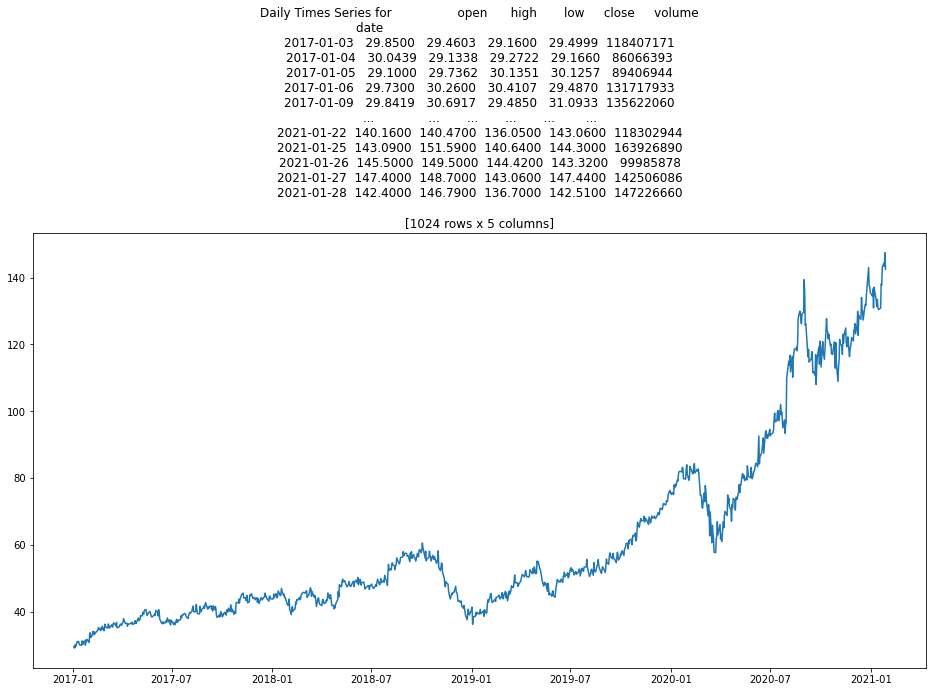

In [20]:
get_stock_chart("AAPL", start, end)

In [21]:
# Now adding user inputs:

In [22]:
# starting = datetime(input())

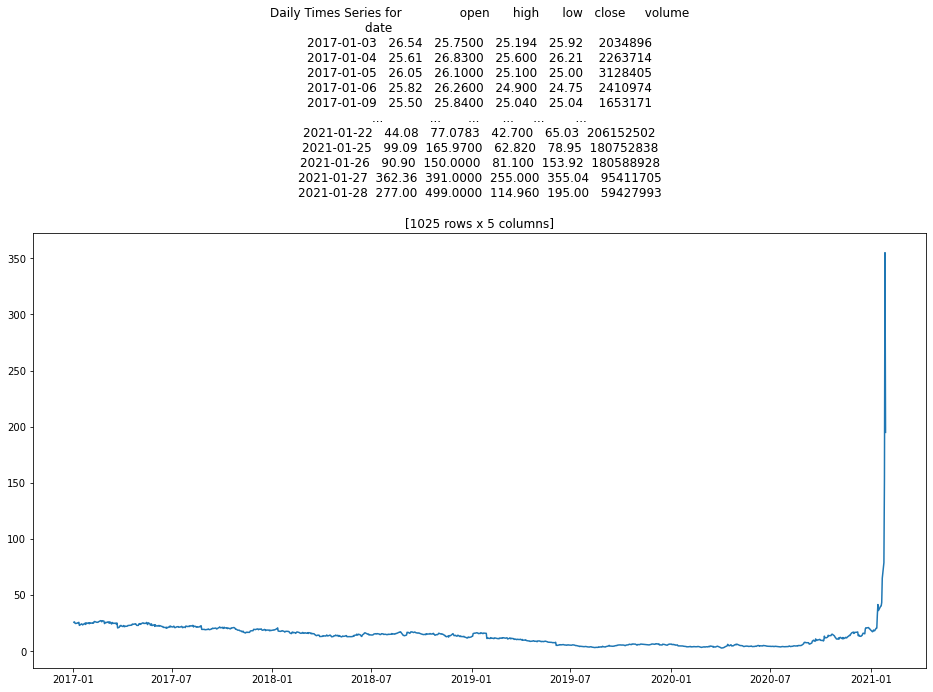

In [23]:
get_stock_chart("GME", start, end)

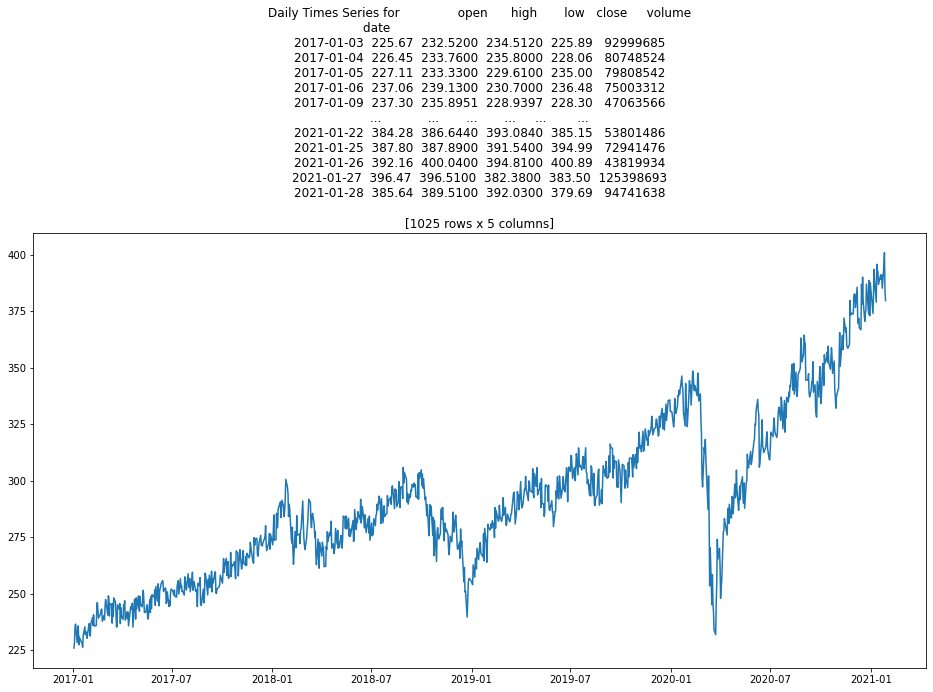

In [24]:
get_stock_chart("SPY", start, end)

-----------------

In [25]:
# Status update

In [26]:
import requests

In [27]:
import env

In [28]:
r = requests.get(f"https://api.orats.io/datav2/cores?token={env.orats_token}&ticker=AAPL")
r.json()

{'data': [{'ticker': 'AAPL',
   'tradeDate': '2021-01-29',
   'assetType': 3,
   'priorCls': 137.09,
   'pxAtmIv': 132.89,
   'mktCap': 2235644,
   'cVolu': 2115509,
   'cOi': 5810755,
   'pVolu': 1096206,
   'pOi': 3417033,
   'orFcst20d': 38.751,
   'orIvFcst20d': 47.175,
   'orFcstInf': 33.59,
   'orIvXern20d': 43.25,
   'orIvXernInf': 38.71,
   'iv200Ma': 35.79,
   'atmIvM1': 44.373,
   'atmFitIvM1': 45.291,
   'atmFcstIvM1': 38.751,
   'dtExM1': 22,
   'atmIvM2': 44.074,
   'atmFitIvM2': 43.021,
   'atmFcstIvM2': 37.452,
   'dtExM2': 50,
   'atmIvM3': 42.864,
   'atmFitIvM3': 42.161,
   'atmFcstIvM3': 36.682,
   'dtExM3': 78,
   'atmIvM4': 42.451,
   'atmFitIvM4': 41.276,
   'atmFcstIvM4': 36.379,
   'dtExM4': 141,
   'iRate5wk': 0.08,
   'iRateLt': 0.12,
   'px1kGam': 5994.01,
   'volOfVol': 0.0715,
   'volOfIvol': 0.0445,
   'slope': 0.158221,
   'slopeInf': 0.46635,
   'slopeFcst': -0.04731,
   'slopeFcstInf': 0.62673,
   'deriv': 0.0987,
   'derivInf': 0.0771,
   'derivFcst': 

In [29]:
from pandas.tseries.offsets import BDay

In [30]:
today_date = datetime.datetime.today()
print(today_date)

2021-01-29 17:37:00.004714


In [31]:
yesterday_date = (today_date - BDay(1))

In [32]:
from polygon import RESTClient


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.stocks_equities_daily_open_close("AAPL", "2021-01-25")
        print(f"On: {resp.from_} Apple opened at {resp.open} and closed at {resp.close}")


if __name__ == '__main__':
    main()

On: 2021-01-25 Apple opened at 143.07 and closed at 142.92


In [33]:
import datetime

from polygon import RESTClient


def ts_to_datetime(ts) -> str:
    return datetime.datetime.fromtimestamp(ts / 1000.0).strftime('%Y-%m-%d %H:%M')


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        from_ = "2019-01-01"
        to = "2019-02-01"
        resp = client.stocks_equities_aggregates("AAPL", 1, "minute", from_, to, unadjusted=False)

        print(f"Minute aggregates for {resp.ticker} between {from_} and {to}.")

        for result in resp.results:
            dt = ts_to_datetime(result["t"])
            print(f"{dt}\n\tO: {result['o']}\n\tH: {result['h']}\n\tL: {result['l']}\n\tC: {result['c']} ")


if __name__ == '__main__':
    main()

Minute aggregates for AAPL between 2019-01-01 and 2019-02-01.
2019-01-30 17:37
	O: 41.41
	H: 41.41
	L: 41.41
	C: 41.41 
2019-01-30 17:38
	O: 41.3975
	H: 41.4125
	L: 41.3975
	C: 41.4125 
2019-01-30 17:39
	O: 41.42
	H: 41.42
	L: 41.4125
	C: 41.4125 
2019-01-30 17:41
	O: 41.415
	H: 41.4275
	L: 41.415
	C: 41.415 
2019-01-30 17:42
	O: 41.425
	H: 41.425
	L: 41.425
	C: 41.425 
2019-01-30 17:43
	O: 41.435
	H: 41.435
	L: 41.425
	C: 41.435 
2019-01-30 17:44
	O: 41.425
	H: 41.425
	L: 41.425
	C: 41.425 
2019-01-30 17:45
	O: 41.4225
	H: 41.4225
	L: 41.4225
	C: 41.4225 
2019-01-30 17:46
	O: 41.4125
	H: 41.4125
	L: 41.4125
	C: 41.4125 
2019-01-30 17:47
	O: 41.4125
	H: 41.4125
	L: 41.4125
	C: 41.4125 
2019-01-30 17:48
	O: 41.425
	H: 41.425
	L: 41.4125
	C: 41.425 
2019-01-30 17:50
	O: 41.425
	H: 41.425
	L: 41.425
	C: 41.425 
2019-01-30 17:52
	O: 41.425
	H: 41.425
	L: 41.425
	C: 41.425 
2019-01-30 17:53
	O: 41.425
	H: 41.4325
	L: 41.425
	C: 41.4325 
2019-01-30 17:54
	O: 41.425
	H: 41.425
	L: 41.425
	C: 

In [34]:
import tda